# Le tp1 de machine learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1) Analyse des données

# Charger la base de données (dataset.dat)

In [18]:

data = np.loadtxt('dataset.dat')

In [19]:
#print()


# Mettre dans une variable X les observations (les 2 premières colonnes), et dans la variable y les labels (dernière colonne), en s'assurant que les valeurs de y soient entières.

In [20]:
X, y = data[:,0:2],data[:,2]
y = y.astype(int) # conversion de y en entier
print(y)

[1 1 0 1 0 2 1 2 0 2 1 1 2 0 0 2 1 1 0 2 1 1 1 0 0 2 0 1 0 1 2 0 2 1 2 1 1
 0 1 0 0 1 1 0 1 2 2 2 1 0 0 0 1 1 1 2 1 1 0 2 0 2 1 0 0 1 2 1 2 1 2 2 1 0
 0 0 1 1 0 0 1 2 1 0 1 1 1 2 2 2 2 1 0 2 1 1 2 2 1 0 0 1 2 0 0 0 0 2 2 1 2
 1 2 0 1 0 0 1 0 2 1 2 0 1 1 2 0 0 0 0 0 2 1 2 0 0 0 2 0 0 2 2 0 2 2 0 2 1
 1 1 1 1 2 2 2 0 0 2 0 2 0 1 0 0 2 2 1 2 2 1 2 1 0 1 1 1 1 1 2 1 2 2 0 1 2
 2 1 0 0 0 1 2 1 2 2 0 2 1 1 1 1 2 0 2 2 2 2 0 1 0 2 0 0 2 2 2 2 0 2 0 2 1
 0 0 0 2 2 0 1 2 0 0 0 0 0 1 2 2 1 2 0 1 1 0 1 0 0 0 1 2 2 2 2 2 2 0 2 0 1
 1 1 1 0 1 2 2 0 0 0 1 2 2 2 1 0 1 0 1 1 1 2 2 1 2 2 0 2 1 2 2 0 0 1 1 0 1
 0 1 0 0]


# diviser la base de données (fonction train_test_split) en deux corpus (les classes sont équi-représentées dans les deux corpus) :

    base d’apprentissage (X_train, y_train) : 70% des données
    base de test (X_test, y_test): le reste (30% des données)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=1)

# Afficher toutes les données (apprentissage et test) en utilisant les fonctions pyplot.scatter et pyplot.show).

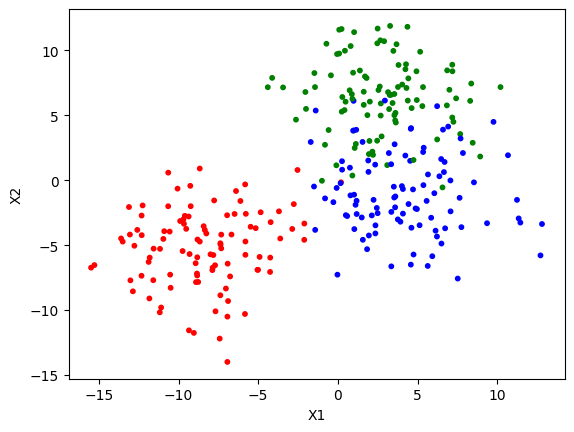

In [22]:
colors = np.array([x for x in "rgbcmyk"])
plt.scatter(X_train[:,0], X_train[:,1], color=colors[y_train].tolist(), s=10)
plt.scatter(X_test[:,0], X_test[:,1], color=colors[y_test].tolist(), s=10)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Définir un classifieur du (1-)plus-proche-voisin (fonction 

In [23]:
one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

#score sur la base d'apprentissage
acc_train_set = one_NN.score(X_train, y_train)
#score sur la base de test
acc_test_set = one_NN.score(X_test, y_test)
print(acc_train_set)
print(acc_test_set)

1.0
0.8666666666666667


# 2) Algorithme du plus-proche-voisin

#Etant donné les variables y_test et y_pred_test, tracer la matrice de confusion 

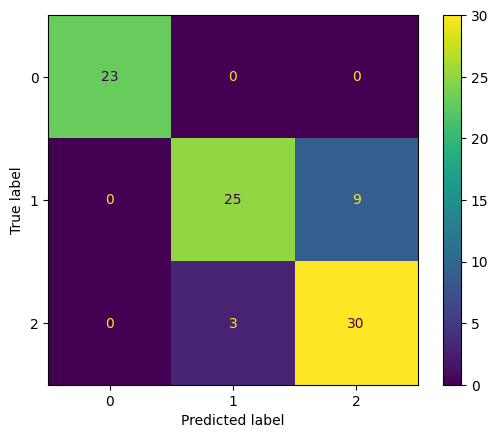

In [24]:
#y_pred_test=one_NN.predict(X_test)
#cm = confusion_matrix(y_test, y_pred_test)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=one_NN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, one_NN.predict(X_test)),display_labels=one_NN.classes_)
disp.plot()
plt.show()

# Afficher les frontières de décision définies par les données d’apprentissage.

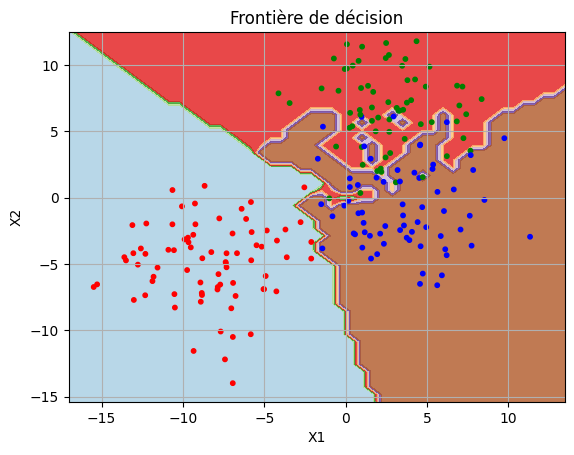

In [11]:
colors = np.array([x for x in "rgbcmyk"])

# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h),
np.arange(y_min, y_max, y_h))
Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.grid()

#afficher les frontières/données d'apprentissage
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_train[:,0], X_train[:,1], color=colors[y_train].tolist(), s=10)
pyplot.title('Frontière de décision')
pyplot.xlabel("X1")
pyplot.ylabel("X2")
pyplot.show()

# Afficher les frontières de décisions et les données de test. Retrouver les erreurs de classification.

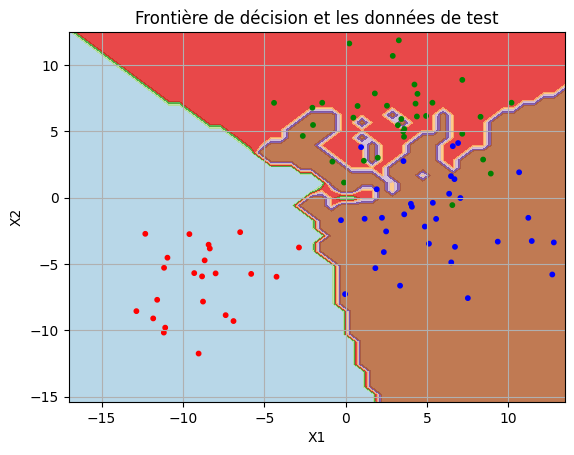

In [12]:
colors = np.array([x for x in "rgbcmyk"])

# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h),
np.arange(y_min, y_max, y_h))

Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.grid()

#afficher les frontières/données de test
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_test[:,0], X_test[:,1], color=colors[y_test].tolist(), s=10)
pyplot.title('Frontière de décision et les données de test')
pyplot.xlabel("X1")
pyplot.ylabel("X2")
pyplot.show()

# 3) Analyse du fonctionnement de l’algorithme

In [13]:
#impact de la taille de la base d'apprentissage
acc_test = []
for size in range(1,100):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train,y_train,train_size=size/100,random_state=1)
    one_NN.fit(X_train1, y_train1)
    #score sur la base de test
    acc_test.append(one_NN.score(X_test,y_test))

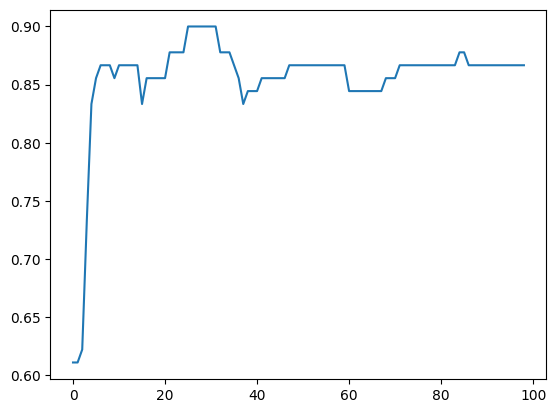

In [14]:
plt.plot(acc_test)

In [15]:
print(len(acc_test))
print(round(acc_test[88],2))
print(round(acc_test[0],2))

99
0.87
0.61


#  Question 11

    Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples d’apprentissage).



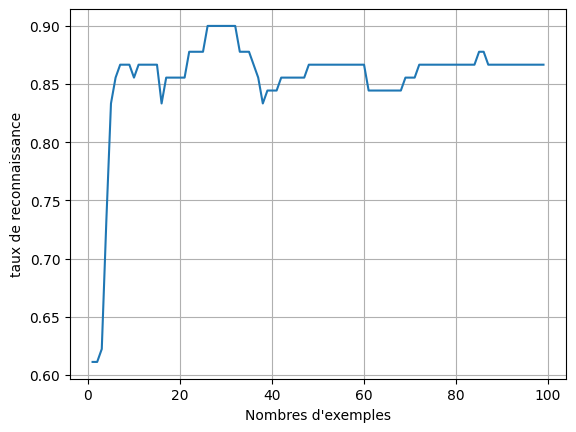

In [16]:
pyplot.xlabel("Nombres d'exemples")
pyplot.ylabel("taux de reconnaissance")
pyplot.plot([i for i in range(1,100)],acc_test)
pyplot.grid()
pyplot.show() 
              

#  QUESTION 12

    Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples d’apprentissage).



#Le nombre d'exemples d'apprentissage a une influence sur la variabilité du taux de reconnaissance.

#  QUESTION 13
Maintenant, on utilise toute la base d’apprentissage pour entrainer, et on fait varier la taille de la base de test.

In [17]:
acc_test = []
one_NN.fit(X_train, y_train)
for size in range(1,90):
    X_test1,X_train1, y_test1, y_train1 = train_test_split(X_test,y_test,train_size=size/90,random_state=1)
    #score sur la base de test
    acc_test.append(one_NN.score(X_test1,y_test1))

In [18]:
print(len(acc_test))
print(round(acc_test[88],2))
print(round(acc_test[0],2))

89
0.87
1.0


# Q14
# Tracer le graphe (taux de reconnaissance en fonction du nombre d’exemples de test).

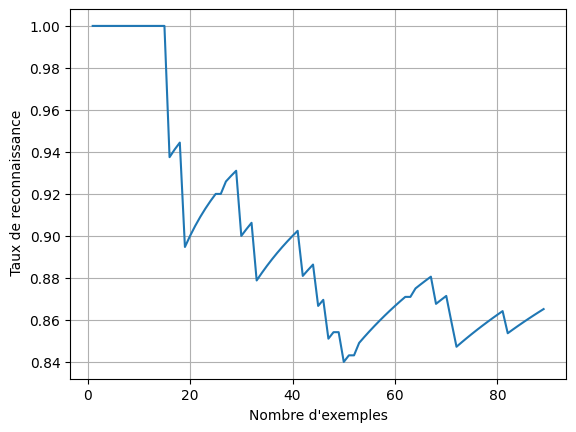

In [19]:
pyplot.xlabel("Nombre d'exemples")
pyplot.ylabel(" Taux de reconnaissance")
pyplot.plot([i for i in range(1,90)],acc_test)
pyplot.grid()
pyplot.show()

# Q15
# Expliquer l’influence du nombre d’exemples de test sur le taux de reconnaissance.
acc_test = []
for k in range(1,200):
    one_NN2 = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    one_NN2.fit(X_train,y_train)
    acc_train.append(one_NN2.score(X_train,y_train))
    acc_test.append(one_NN2.score(X_test,y_test))

Le nombre d'exemples de test rend la mesure du taux de reconnaissance plus fiable moins variable).

#  Q16
# Tester la fonction KNeighborsClassifier en faisant varier le paramètre k de 1 à une valeur maximum kmax choisie judicieusement.

In [22]:
acc_train = []
acc_test = []
for k in range(1,200):
    one_NN2 = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
    one_NN2.fit(X_train,y_train)
    acc_train.append(one_NN2.score(X_train,y_train))
    acc_test.append(one_NN2.score(X_test,y_test))


In [23]:
print(len(acc_test))
print(round(acc_test[98],2))
print(round(acc_test[0],2))
print(len(acc_train))
print(round(acc_train[98],2))
print(round(acc_train[0],2))

199
0.9
0.87
199
0.9
1.0


# Question 17
# Justifier le choix de kmax
En choisissant un kmax tout petit, notre modèle aurait été très sensible au bruit , on aurait eu une bonne résolution. 
Dans le cas inverse, si notre kmax était trop élevé, on aurai un modèle peu sensible avec un biais élevé.
Ce kmax correspond nous correspond mieux car il est ni trop faible, ni trop élevé.

# Q 18
# Observer l’influence du paramètre k sur le taux d’erreur en test : tracer le graphe (taux de reconnaissance en fonction de k).

NameError: name 'acc_test' is not defined

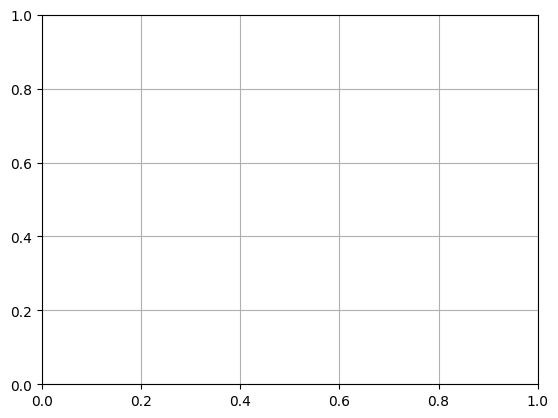

In [3]:
pyplot.grid()
a = [1-i for i in acc_test]
pyplot.plot([i for i in range(1,200)],a) # acc_test contains accuracy test values
pyplot.xlabel("k")
pyplot.ylabel("Taux d'erreur")
pyplot.show()

# Q 19
# Donner la valeur optimale k* (qui minimise l’erreur en test) de k.
k*=20
On prend l'abscisse de la plus petite valeur du graphique

# Q 20
# Afficher les frontières de décision pour k = 1.

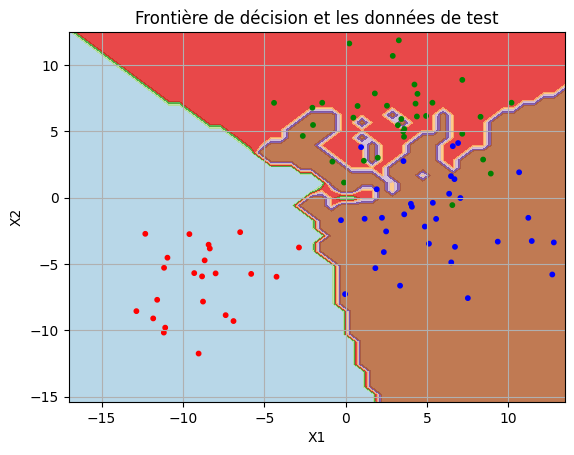

In [27]:
colors = np.array([x for x in "rgbcmyk"])

one_NN = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
one_NN.fit(X_train, y_train)

# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h),
np.arange(y_min, y_max, y_h))

Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.grid()

#afficher les frontières/données de test
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_test[:,0], X_test[:,1], color=colors[y_test].tolist(), s=10)
pyplot.title('Frontière de décision et les données de test')
pyplot.xlabel("X1")
pyplot.ylabel("X2")
pyplot.show()

# Q 21

# Afficher les frontières de décision pour k = k*



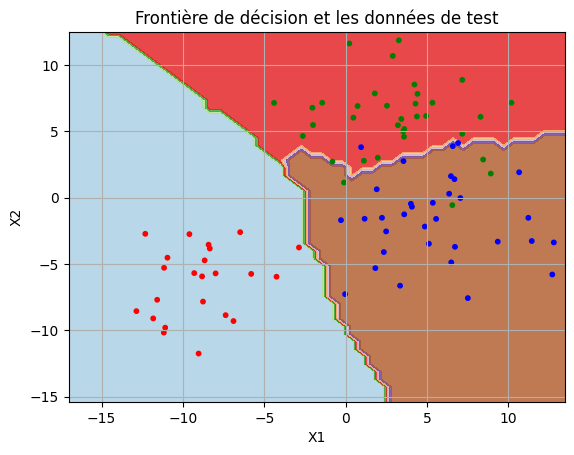

In [28]:
colors = np.array([x for x in "rgbcmyk"])

one_NN = KNeighborsClassifier(n_neighbors=21, algorithm='brute')
one_NN.fit(X_train, y_train)

# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h),
np.arange(y_min, y_max, y_h))

Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.grid()

#afficher les frontières/données de test
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_test[:,0], X_test[:,1], color=colors[y_test].tolist(), s=10)
pyplot.title('Frontière de décision et les données de test')
pyplot.xlabel("X1")
pyplot.ylabel("X2")
pyplot.show()

# Q 22
# Afficher les frontières de décision pour k = kmax

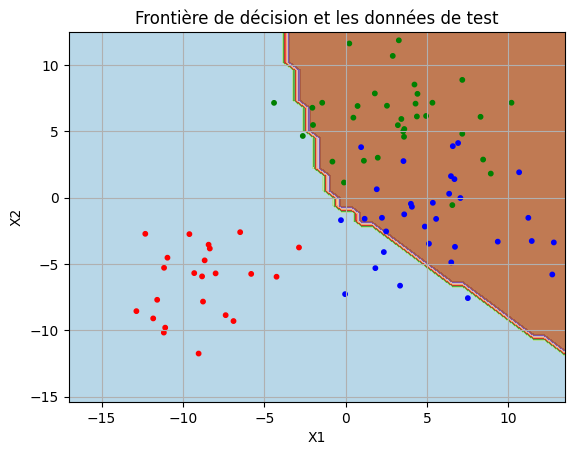

In [29]:
colors = np.array([x for x in "rgbcmyk"])

one_NN = KNeighborsClassifier(n_neighbors=199, algorithm='brute')
one_NN.fit(X_train, y_train)

# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h),
np.arange(y_min, y_max, y_h))

Y = one_NN.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
pyplot.grid()

#afficher les frontières/données de test
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_test[:,0], X_test[:,1], color=colors[y_test].tolist(), s=10)
pyplot.title('Frontière de décision et les données de test')
pyplot.xlabel("X1")
pyplot.ylabel("X2")
pyplot.show()

# Q 23
# Conclure sur l’impact de k sur la forme des frontières et justifier qualitativement la valeur k*.
Lorsque k a une faible valeur, on obtient des frontières assez complexe entre 
les classes. Dans le cas contraires, quand notre k a une grande valeur, 

# Q 24
# Dans ces trois situations, que peut-on dire du biais et de la variance ?
Dans la première situation avec k=1, notre biais est assez faible et la variance élevée.
Dans la seconde situation avec k=k*, notre biais et notre variance ont des valeurs normales.
Dans la dernière situation avec k=kmax, notre bias est très grand et notre variance est faible.

# Q 25
# Observer l’influence du paramètre k sur le taux d’erreur en apprentissage : tracer le graphe (taux de reconnaissance en fonction de k).

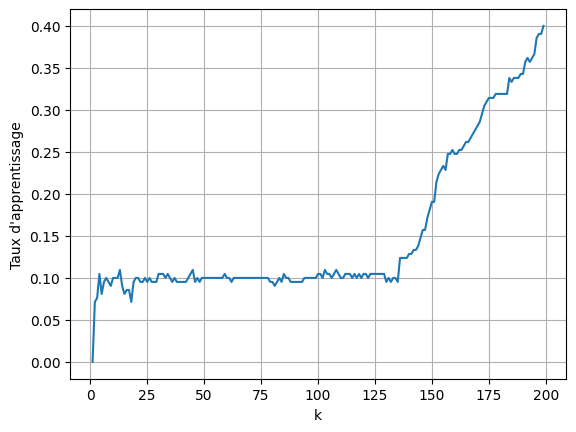

In [30]:
pyplot.grid()
b = [1-i for i in acc_train]
pyplot.plot([i for i in range(1,200)],b) # acc_test contains accuracy test values
pyplot.xlabel("k")
pyplot.ylabel("Taux d'apprentissage")
pyplot.show()

# Q 26
# Le protocole mis en œuvre pour régler le paramètre k est-il satisfaisant ? Justifier votre réponse.

Nous avons étudié plusieurs situations pour régler notre valeur de k. On a 
étudié le taux d'erreur, et on a utiliser des graphes pour étudier les 
différents cas.